In [36]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)

x = torch.Tensor(np.arange(0, 100) + np.random.normal(0, 3, size=100)).view(100, 1)

y = torch.Tensor(np.concatenate((
    np.random.normal(1, 0.5, size=10),
    np.random.normal(1, 0.5, size=10),
    np.random.normal(3, 0.5, size=10),
    np.random.normal(5, 0.5, size=40),
    np.random.normal(3, 0.5, size=30),
))).view(100, 1)

In [87]:
# F = lambda x: 2.7 ** x
F = torch.nn.ReLU()
A = torch.nn.Linear(1, 20)
B = torch.nn.Linear(20, 20)
D = torch.nn.Linear(20, 20)
E = torch.nn.Linear(20, 20)
E = torch.nn.Linear(20, 10)
G = torch.nn.Linear(10, 1)

def C(y_pop, y_hat):
    return torch.square(y_pop - y_hat).sum()

def network(pt):
    return G(F(E(F(D(F(B(F(A(pt)))))))))

lr = 0.0001
prev_L = None

for t in range(5000000):
    Y = network(x)
    L = C(y, Y)
    if prev_L == L:
        break;

    prev_L = L
    if t % 1000 == 0: print("L:", L)
    L.backward()
    with torch.no_grad():
        A.weight -= A.weight.grad * lr
        B.weight -= B.weight.grad * lr
        A.bias -= A.bias.grad * lr
        B.bias -= B.bias.grad * lr
        A.zero_grad()
        B.zero_grad()

L: tensor(1862.0872, grad_fn=<SumBackward0>)
L: tensor(355.8153, grad_fn=<SumBackward0>)
L: tensor(344.2577, grad_fn=<SumBackward0>)
L: tensor(366.5570, grad_fn=<SumBackward0>)
L: tensor(363.9718, grad_fn=<SumBackward0>)
L: tensor(360.8845, grad_fn=<SumBackward0>)
L: tensor(312.5574, grad_fn=<SumBackward0>)
L: tensor(313.0637, grad_fn=<SumBackward0>)
L: tensor(350.8564, grad_fn=<SumBackward0>)
L: tensor(340.1458, grad_fn=<SumBackward0>)
L: tensor(254.1483, grad_fn=<SumBackward0>)
L: tensor(270.7520, grad_fn=<SumBackward0>)
L: tensor(263.7193, grad_fn=<SumBackward0>)
L: tensor(257.5750, grad_fn=<SumBackward0>)
L: tensor(252.9525, grad_fn=<SumBackward0>)
L: tensor(253.7729, grad_fn=<SumBackward0>)
L: tensor(248.4094, grad_fn=<SumBackward0>)
L: tensor(247.0387, grad_fn=<SumBackward0>)
L: tensor(203.3975, grad_fn=<SumBackward0>)
L: tensor(239.5662, grad_fn=<SumBackward0>)
L: tensor(222.9465, grad_fn=<SumBackward0>)
L: tensor(222.7952, grad_fn=<SumBackward0>)
L: tensor(175.0435, grad_fn=<Su

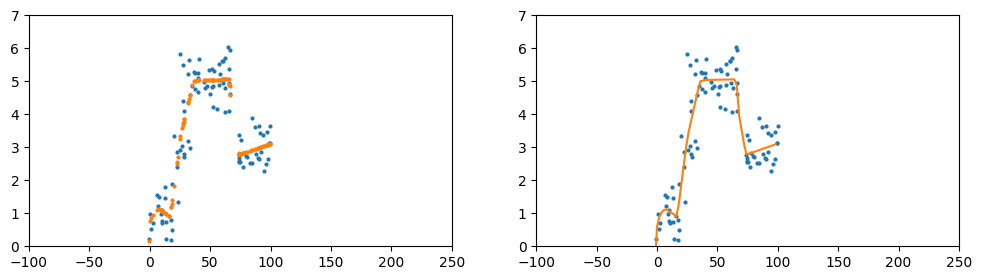

In [88]:
plt.rcParams['lines.markersize'] = 2
fig, axs = plt.subplots(ncols=2, figsize=(12, 3))
axs[0].set_xlim(-100, 250)
axs[0].set_ylim(0, 7)
axs[0].scatter(x, y);
axs[0].scatter(x, network(x).detach().numpy());

domain = torch.Tensor(np.arange(-100, 100, 2)).view(100, 1)
axs[1].set_xlim(-100, 250)
axs[1].set_ylim(0, 7)
axs[1].scatter(x, y);
axs[1].plot(domain, network(domain).detach().numpy(), color="#ff7f0f");